In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#DATASET
df_path= 'Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

In [3]:
df = pd.read_csv(df_path)

## 1. Exploratory data analysis:
1. Descriptive analysis
2. Data visualization
3. Correlation test (Pearson correlation)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [5]:
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
# Check apakah ada NULL values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

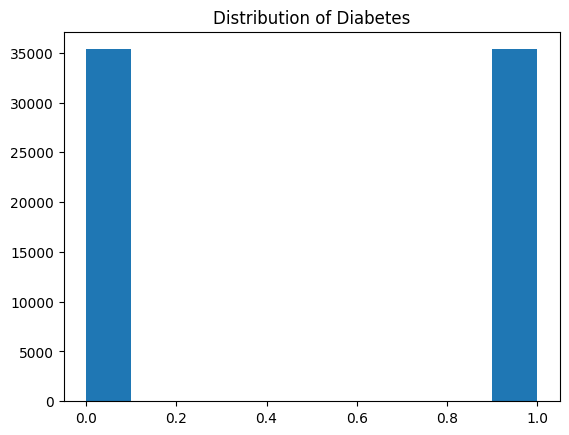

In [8]:
plt.hist(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes')
plt.show()

## 2. Split data untuk training dan testing (80:20).
Index dari data training dan test harus sama ketika digunakan untuk training/testing pada semua algoritma klasifikasi.


In [9]:
# codeblock for split data
X = df.iloc[:,1:]
y = df['Diabetes_binary']

# Bagi dataset menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Metode klasifikasi:
1. Multinomial Naive Bayes
2. SVM
3. Random Forest
4. Stochastic Gradient Descent
5. Logisticc Regression (isi dulu aja hha)

### SVM

In [10]:
#codeblock for classification

# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

In [11]:
# Latih model pada data latih
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Lakukan prediksi pada data uji
svm_pred = svm_model.predict(X_test)

### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=500)

In [14]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [15]:
rfc_pred = rfc_model.predict(X_test)

## 4. Model evaluator:
1. Precision
2. Recall
3. F1-measure

### SVM

In [16]:
#codeblock for evaluator
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7504859627944225
Recall: 0.7484263384963576
F1-score: 0.7479570217656902


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[4996 2094]
 [1463 5586]]
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



### Random Forest Classifier

In [18]:
# Hitung precision, recall, dan F1-score
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7504859627944225
Recall: 0.7484263384963576
F1-score: 0.7479570217656902


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[4908 2182]
 [1529 5520]]
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

